# EDA(Exploratory Data Analysis)

In [ ]:
import sys
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Bg_pre2'

In [ ]:
# To import the custom module from a specific path
sys.path.insert(0, os.path.join(current_dir))

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# from ydata_profiling import ProfileReport
from Utools.ML_figures.figures import element_prevalence
%matplotlib inline
%config InlineBackend.figure_format='retina'

## MP DATA

In [ ]:
# read data from mp_raw_data.csv
raw_df = pd.read_csv(os.path.join(current_dir, './Data/mp_raw_data.csv'))
raw_df.head()

,material_id,composition,nsites,crystal_system,space_group,volume,density,density_atomic,efermi,energy_per_atom,formation_energy_per_atom,is_gap_direct,band_gap
0,mp-32800,Ac16 S24,40,Tetragonal,122,1118.407852,6.535149,27.960196,5.791820,-34.768478,-2.492486,False,2.2962
1,mp-867311,Ac1 Ag1 Te2,4,Cubic,225,122.518406,7.997421,30.629602,6.031096,-36.203183,-0.996232,False,0.0794
2,mp-866101,Ac1 Cr1 O3,5,Cubic,221,61.362845,8.848788,12.272569,6.364737,-8.862593,-3.138972,False,2.0031
3,mp-861502,Ac1 Fe1 O3,5,Cubic,221,61.797311,8.889999,12.359462,6.509045,-8.258555,-2.771539,False,0.9888
4,mp-1183053,Ac1 Ga1 O3,5,Cubic,221,61.455078,9.314495,12.291016,5.476935,-7.461883,-3.063253,False,2.8959


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10342 entries, 0 to 10341
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   material_id                10342 non-null  object 
 1   composition                10342 non-null  object 
 2   nsites                     10342 non-null  int64  
 3   crystal_system             10342 non-null  object 
 4   space_group                10342 non-null  int64  
 5   volume                     10342 non-null  float64
 6   density                    10342 non-null  float64
 7   density_atomic             10342 non-null  float64
 8   efermi                     10336 non-null  float64
 9   energy_per_atom            10342 non-null  float64
 10  formation_energy_per_atom  10342 non-null  float64
 11  is_gap_direct              10342 non-null  bool   
 12  band_gap                   10342 non-null  float64
dtypes: bool(1), float64(7), int64(2), object(3)
me

In [ ]:
raw_df.isna().any()

material_id                  False
composition                  False
nsites                       False
crystal_system               False
space_group                  False
volume                       False
density                      False
density_atomic               False
efermi                        True
energy_per_atom              False
formation_energy_per_atom    False
is_gap_direct                False
band_gap                     False
dtype: bool

In [ ]:
# 查看dft_train数据存在Nan的列
nan_columns = raw_df.columns[raw_df.isnull().any()].tolist()
nan_columns

['efermi']

In [ ]:
raw_df[nan_columns].isnull().sum()

efermi    6
dtype: int64

In [ ]:
# 将nan_columns列的nan值替换为均值
for col in nan_columns:
    mean_value = raw_df[col].mean()
    raw_df[col].fillna(mean_value, inplace=True)

/tmp/ipykernel_6820/804975487.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_df[col].fillna(mean_value, inplace=True)


In [ ]:
raw_df[nan_columns].isnull().sum()

efermi    0
dtype: int64

In [ ]:
raw_df.describe()

,nsites,space_group,volume,density,density_atomic,efermi,energy_per_atom,formation_energy_per_atom,band_gap
count,10342.000000,10342.000000,10342.000000,10342.000000,10342.000000,10342.000000,10342.000000,10342.000000,10342.000000
mean,31.020789,81.625508,665.825421,4.981619,21.978583,2.439148,-7.991760,-1.610338,1.461800
std,27.570354,73.199455,661.919926,1.774340,8.805589,2.117382,5.701092,0.871709,0.860214
min,2.000000,1.000000,16.207758,0.212291,6.739537,-5.988508,-51.095088,-4.389466,0.000100
25%,12.000000,14.000000,246.573903,3.691436,14.675633,1.103214,-8.281941,-2.251889,0.733550
50%,24.000000,62.000000,464.019929,4.719935,20.498848,2.435655,-6.275598,-1.542705,1.473150
75%,40.000000,148.000000,858.470015,5.989743,27.938094,3.732784,-4.751277,-0.903453,2.167800
max,288.000000,230.000000,7131.810149,15.065160,211.507846,10.933763,-1.360409,-0.001509,2.998300


- We can see that the minimum of band gap is 0.0001eV and the maximum is 2.998eV.

In [ ]:
# profile = ProfileReport(raw_df.copy(), title='Pandas Profiling Report of raw dataset', html={'style':{'full_width':True}})
# profile.to_widgets()

In [ ]:
# Check for and remove duplicates
data_df = raw_df.drop_duplicates()

print(f'DataFrame shape after dropping duplicates: {data_df.shape}')

DataFrame shape after dropping duplicates: (10342, 13)


In [ ]:
# Check the type of compound
composition_type = data_df['composition'].unique()
composition_type
display(len(composition_type))

10305

### Raw Data distribution

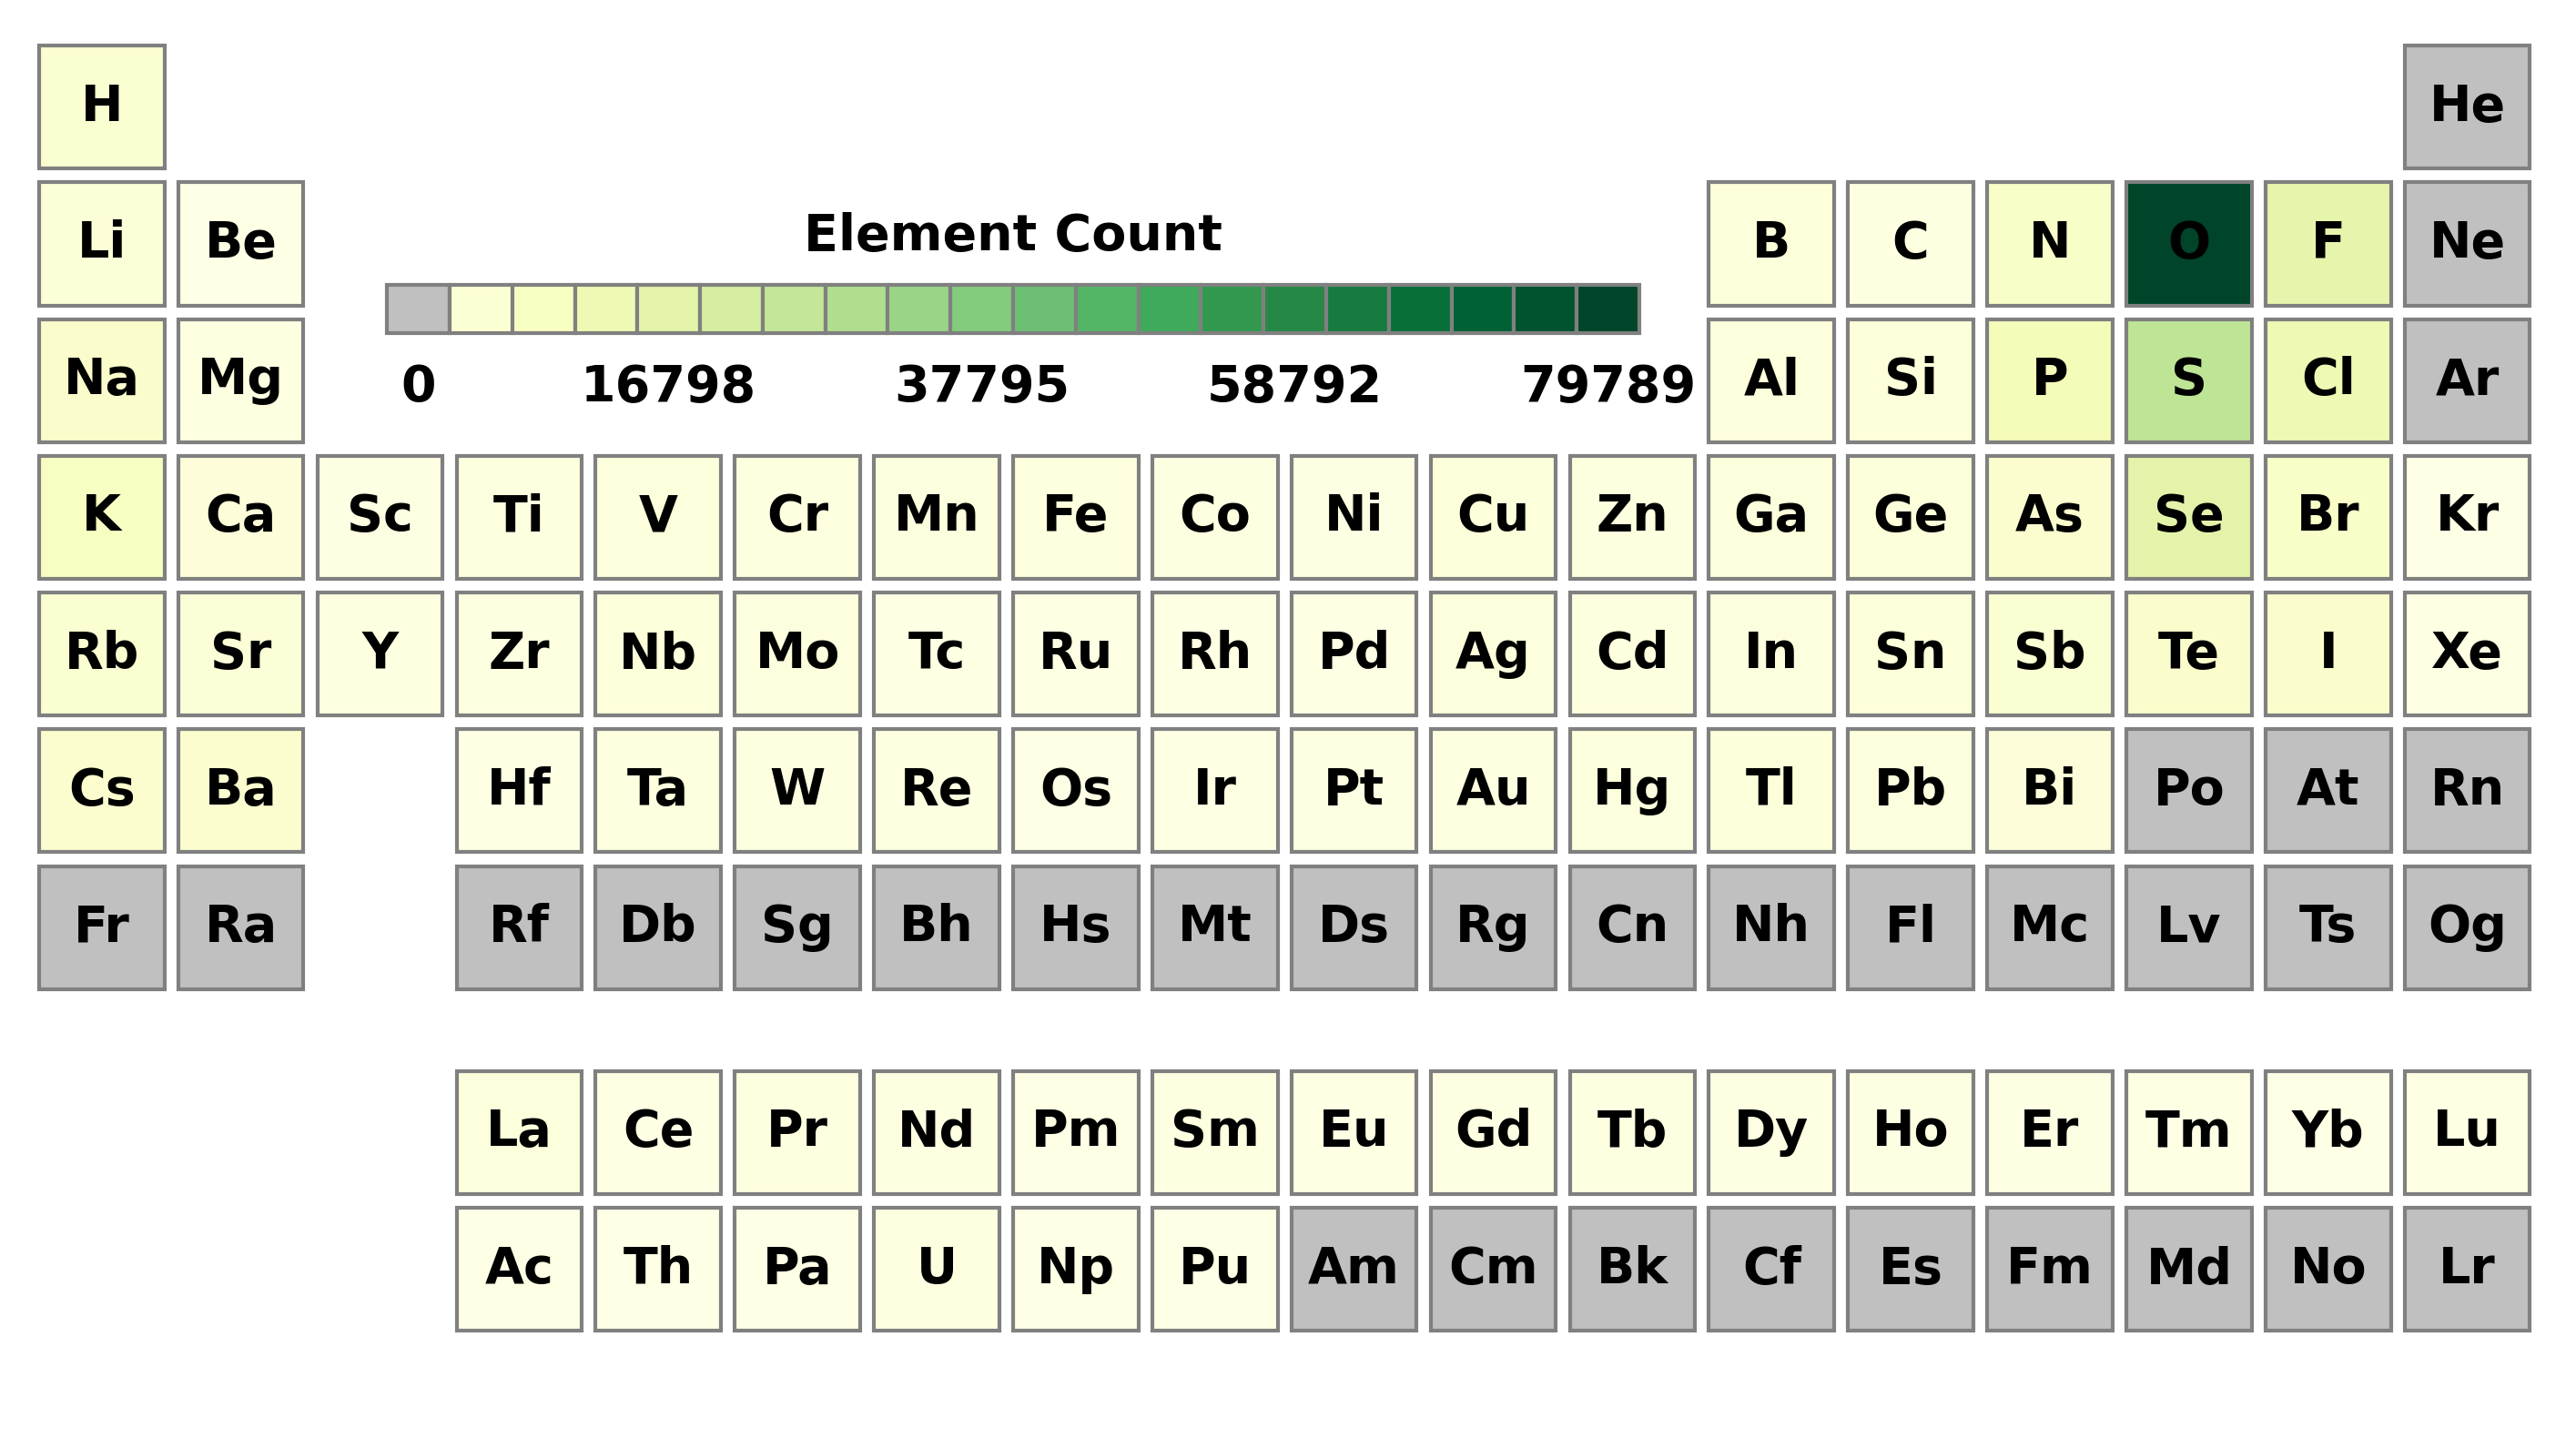

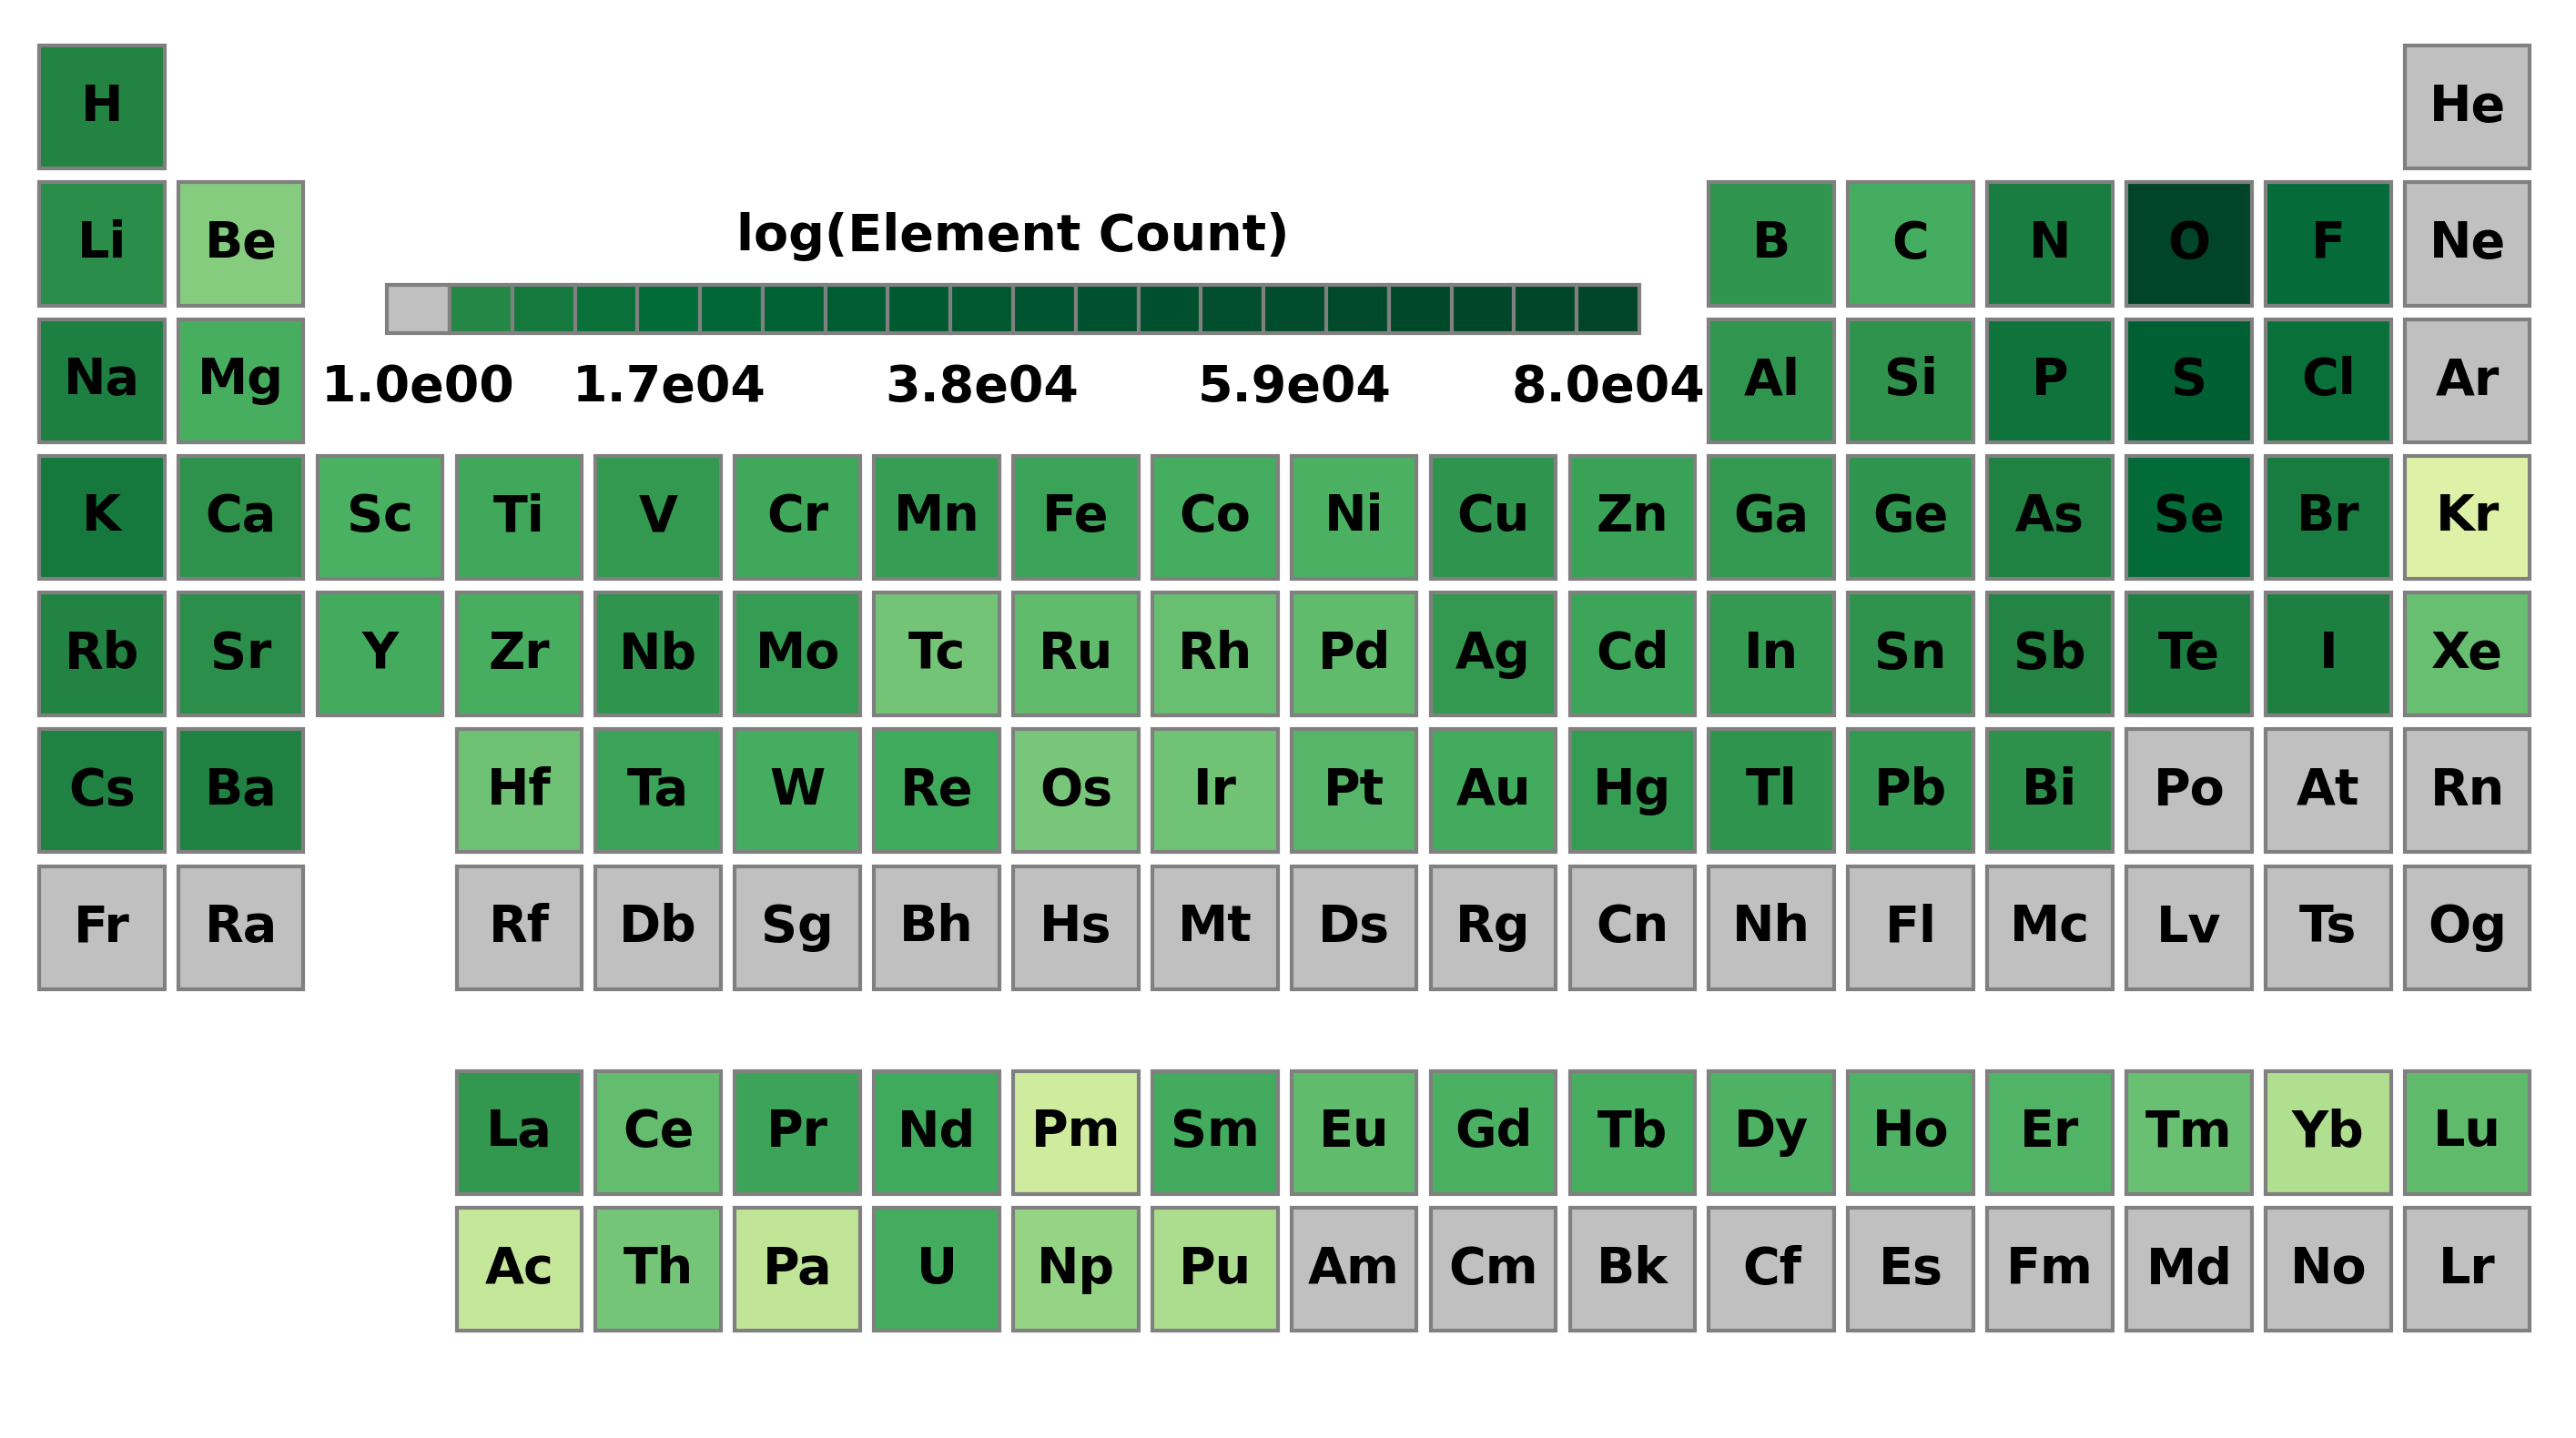

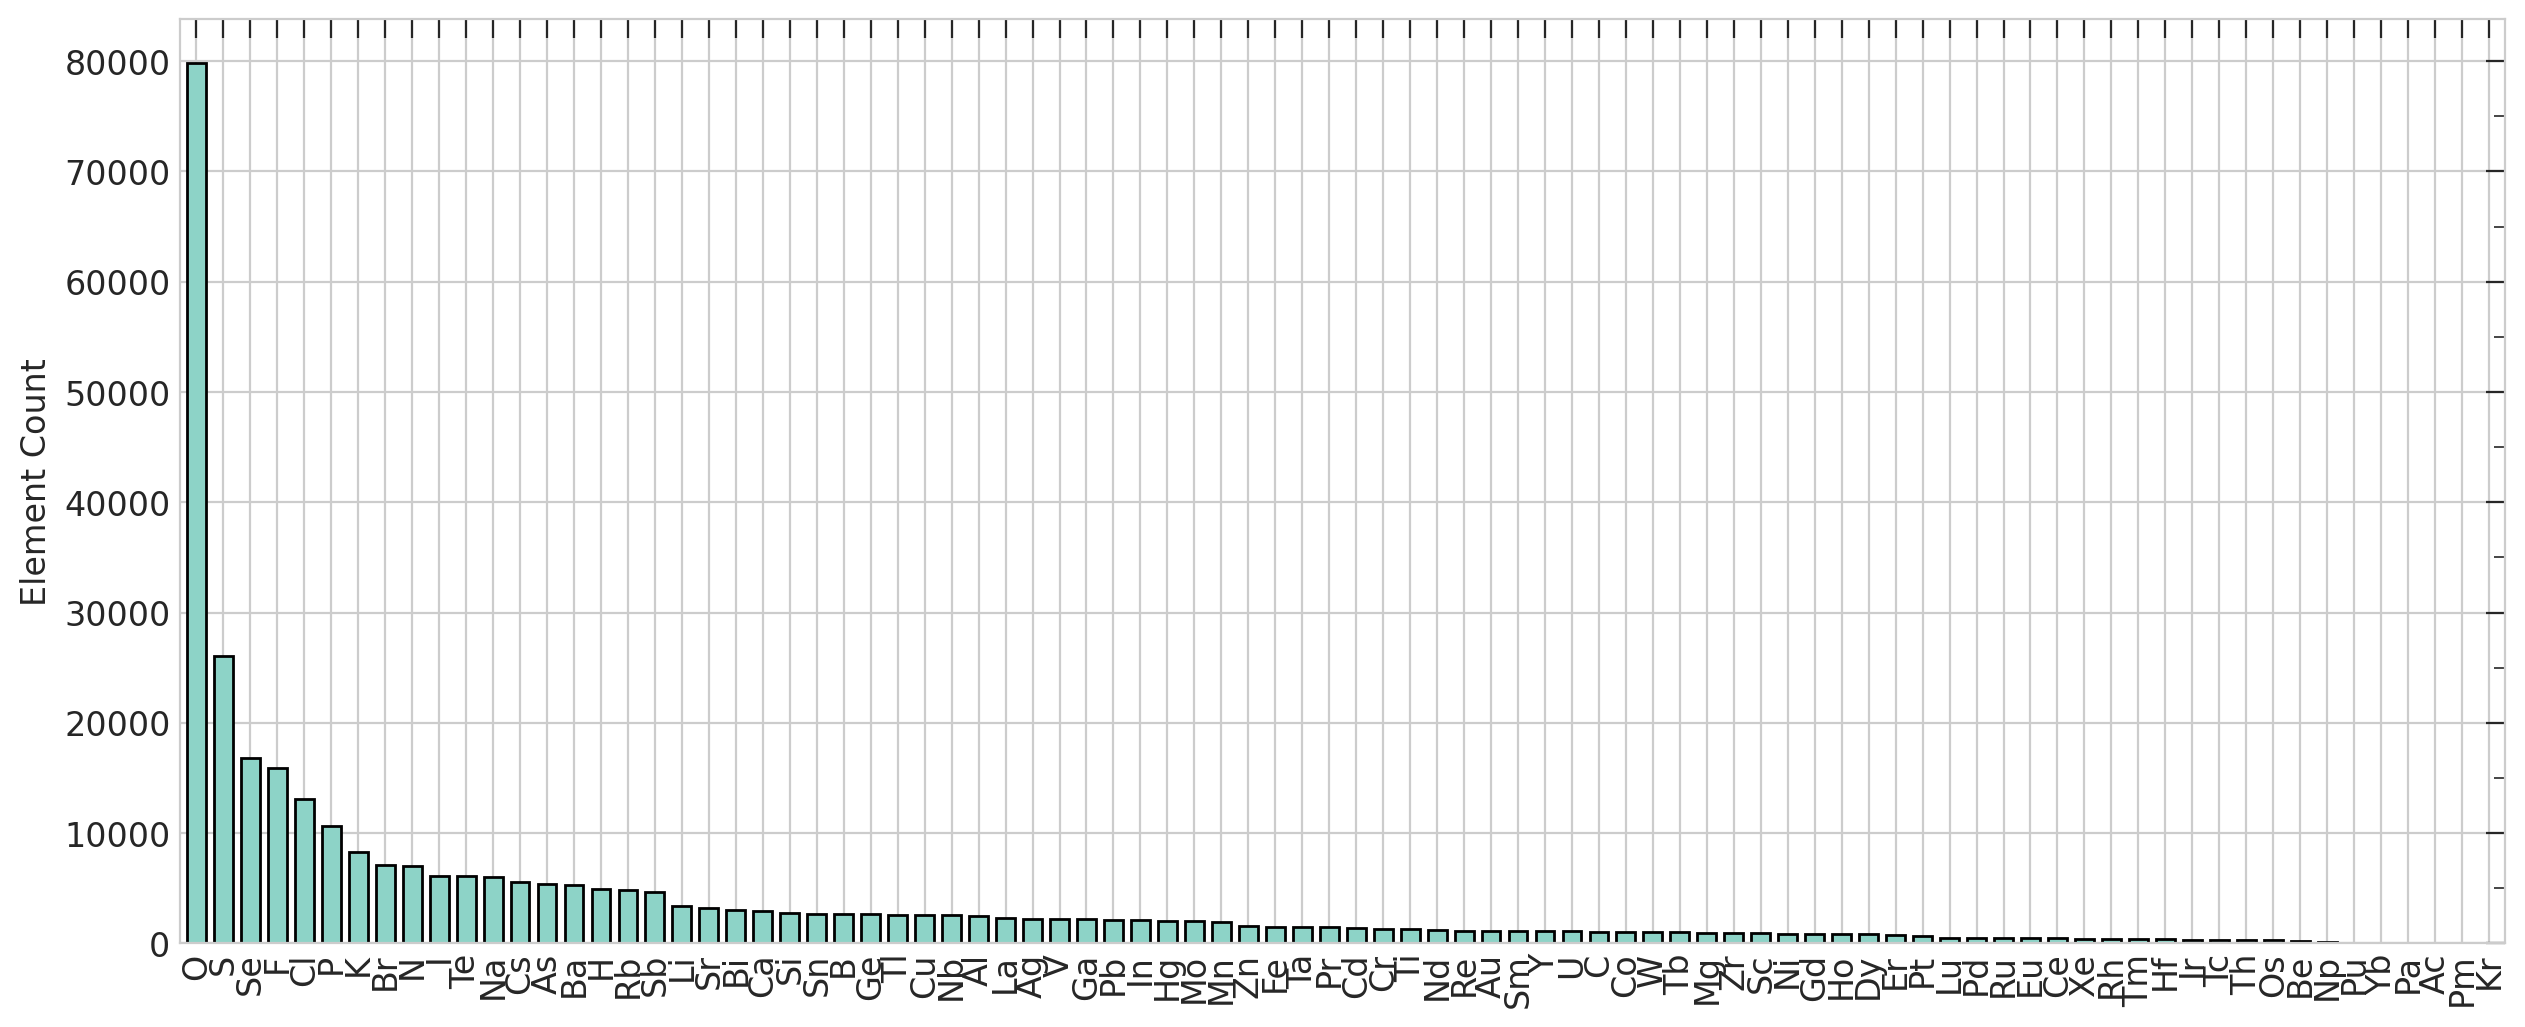

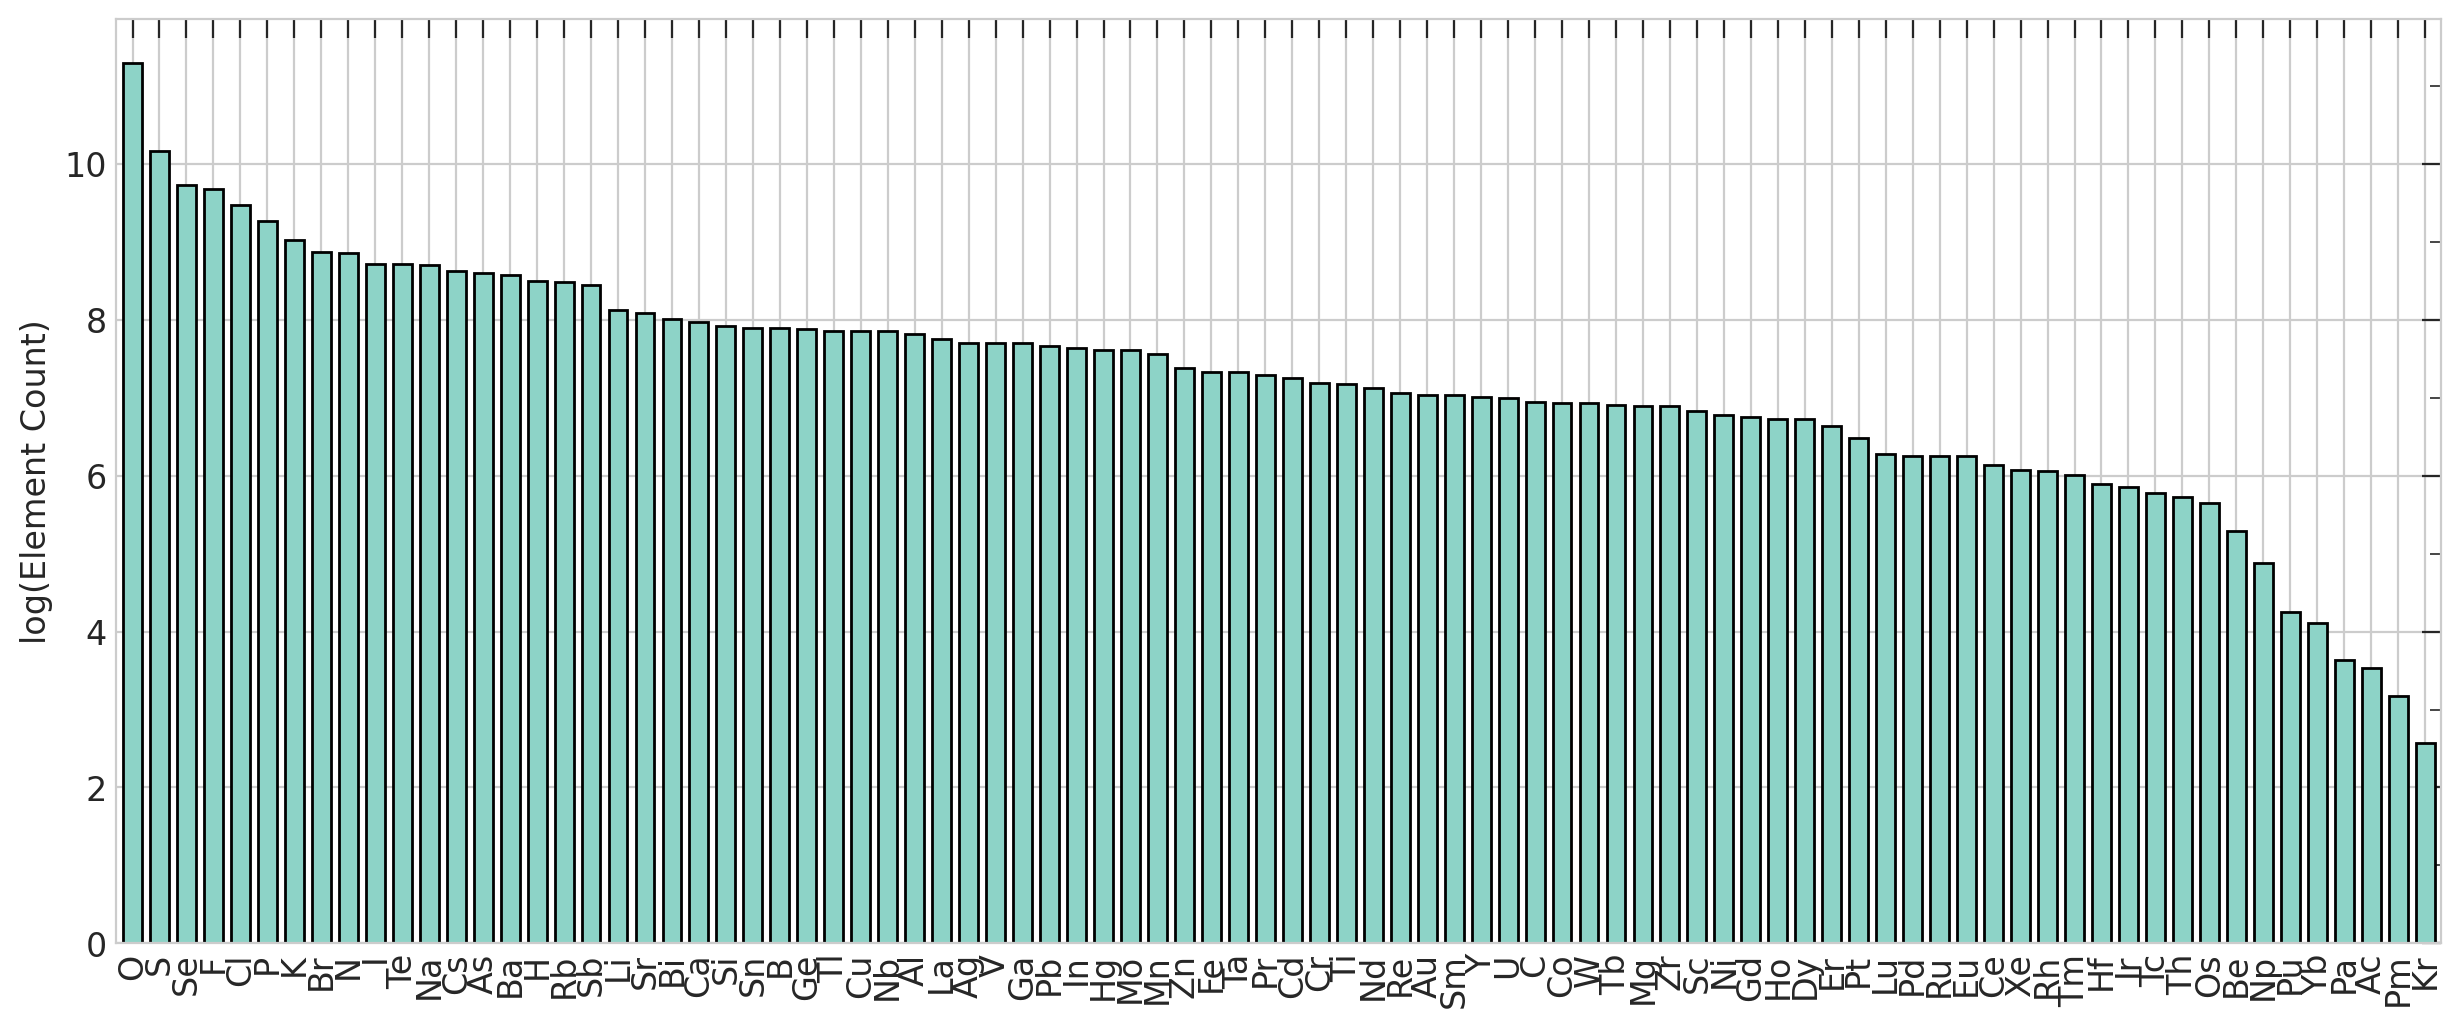

In [ ]:
# Visualizing elemental prevalence in the dataset

formula = data_df.iloc[:, 1]

save_dir = os.path.join(current_dir, './figures/element_prevalence/raw_data/mp')
os.makedirs(save_dir, exist_ok=True)

os.chdir(os.path.join(current_dir, './Utools'))
element_prevalence(formula,
                   name='element_prevalence_ptable',
                   save_dir=save_dir,
                   log_scale=False)
element_prevalence(formula,
                   name='log_element_prevalence_ptable',
                   save_dir=save_dir,
                   log_scale=True)

plt.rcParams.update({'font.size': 12})
element_prevalence(formula,
                   name='element_prevalence',
                   save_dir=save_dir,
                   ptable_fig=False,
                   log_scale=False)
element_prevalence(formula,
                   name='log_element_prevalence',
                   save_dir=save_dir,
                   ptable_fig=False,
                   log_scale=True)
os.chdir(current_dir)

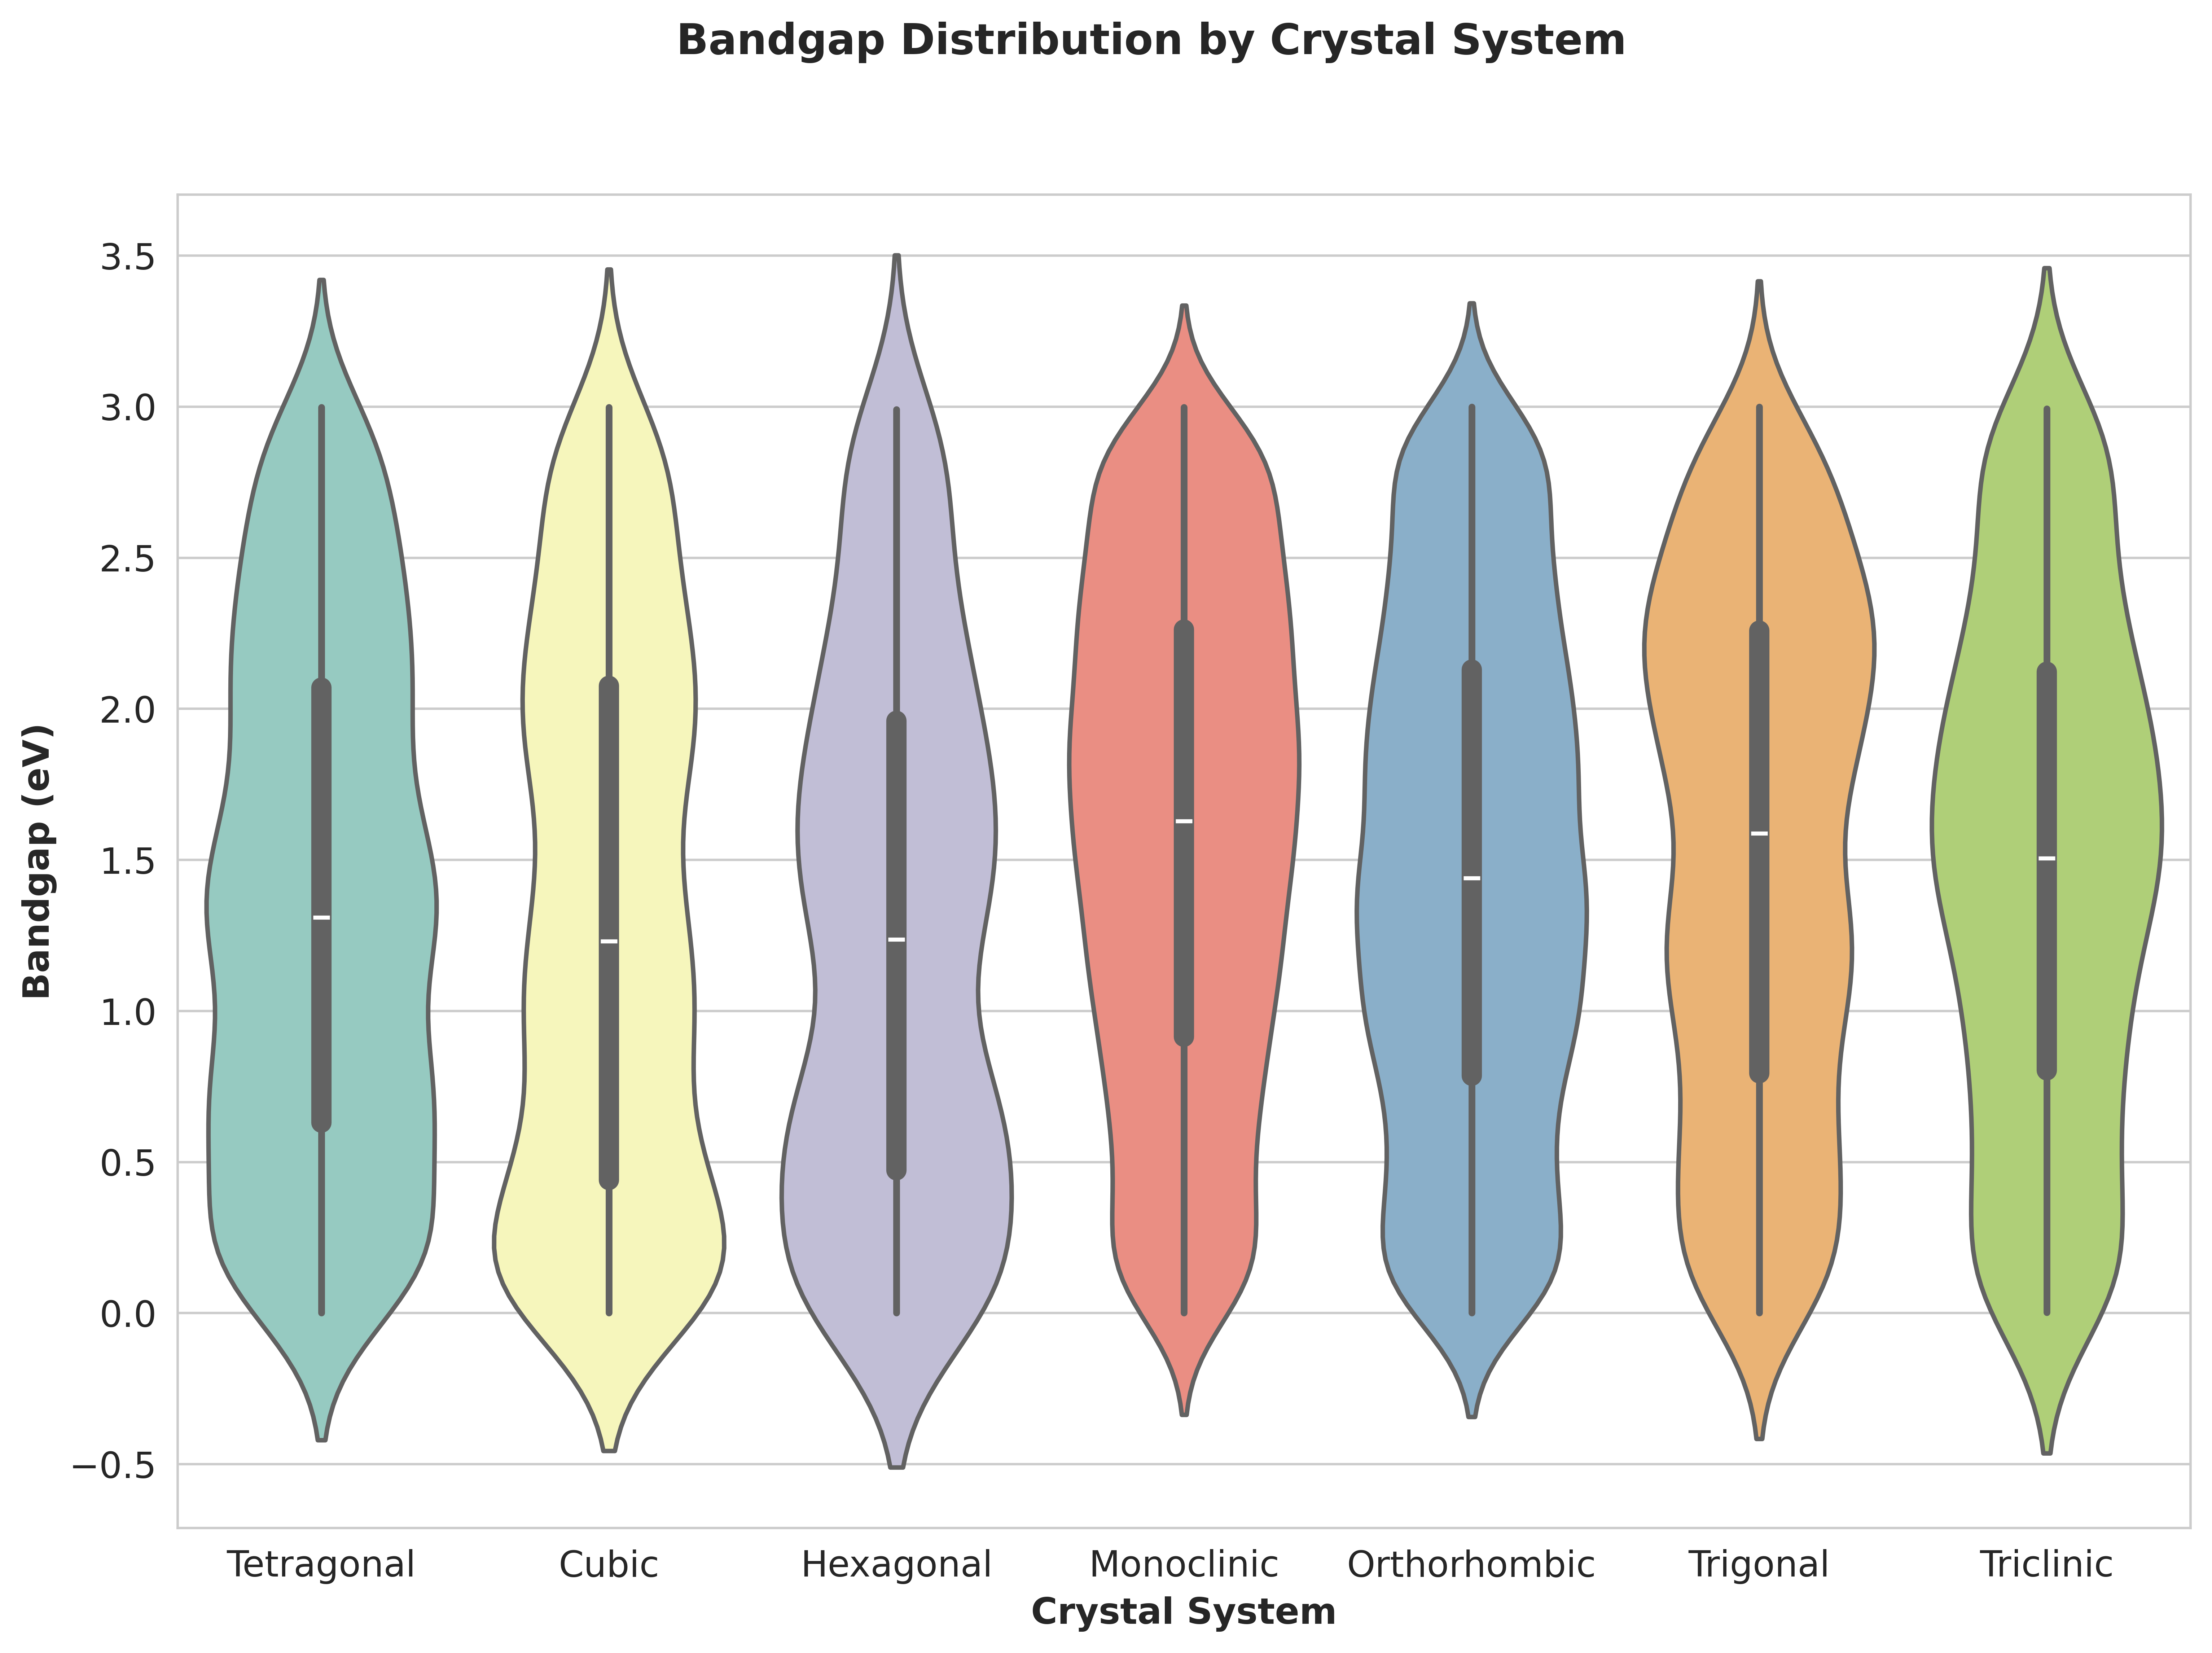

In [ ]:
# Draw a violin plot of the distribution of the bandgap with respect to the crystal system. 
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8), dpi=300)

# Set the color palette
ax = sns.violinplot(
    x="crystal_system",
    y="band_gap",
    data=data_df,
    hue="crystal_system",
    palette="Set3",  # Set3, RdBu
    linewidth=1.5,    
    density_norm="count"     
)

plt.suptitle("Bandgap Distribution by Crystal System", fontsize=14, weight="bold")
plt.xlabel("Crystal System", fontsize=12, weight="bold")
plt.ylabel("Bandgap (eV)", fontsize=12, weight="bold")
# Save the figure
# Create the directory if it doesn't exist
save_dir = os.path.join(current_dir, 'figures', 'data_distribution', 'raw_data', 'mp')
os.makedirs(save_dir, exist_ok=True)
plt.savefig(os.path.join(save_dir, 'bandgap_crystal_system.png'), dpi=300)
plt.show()

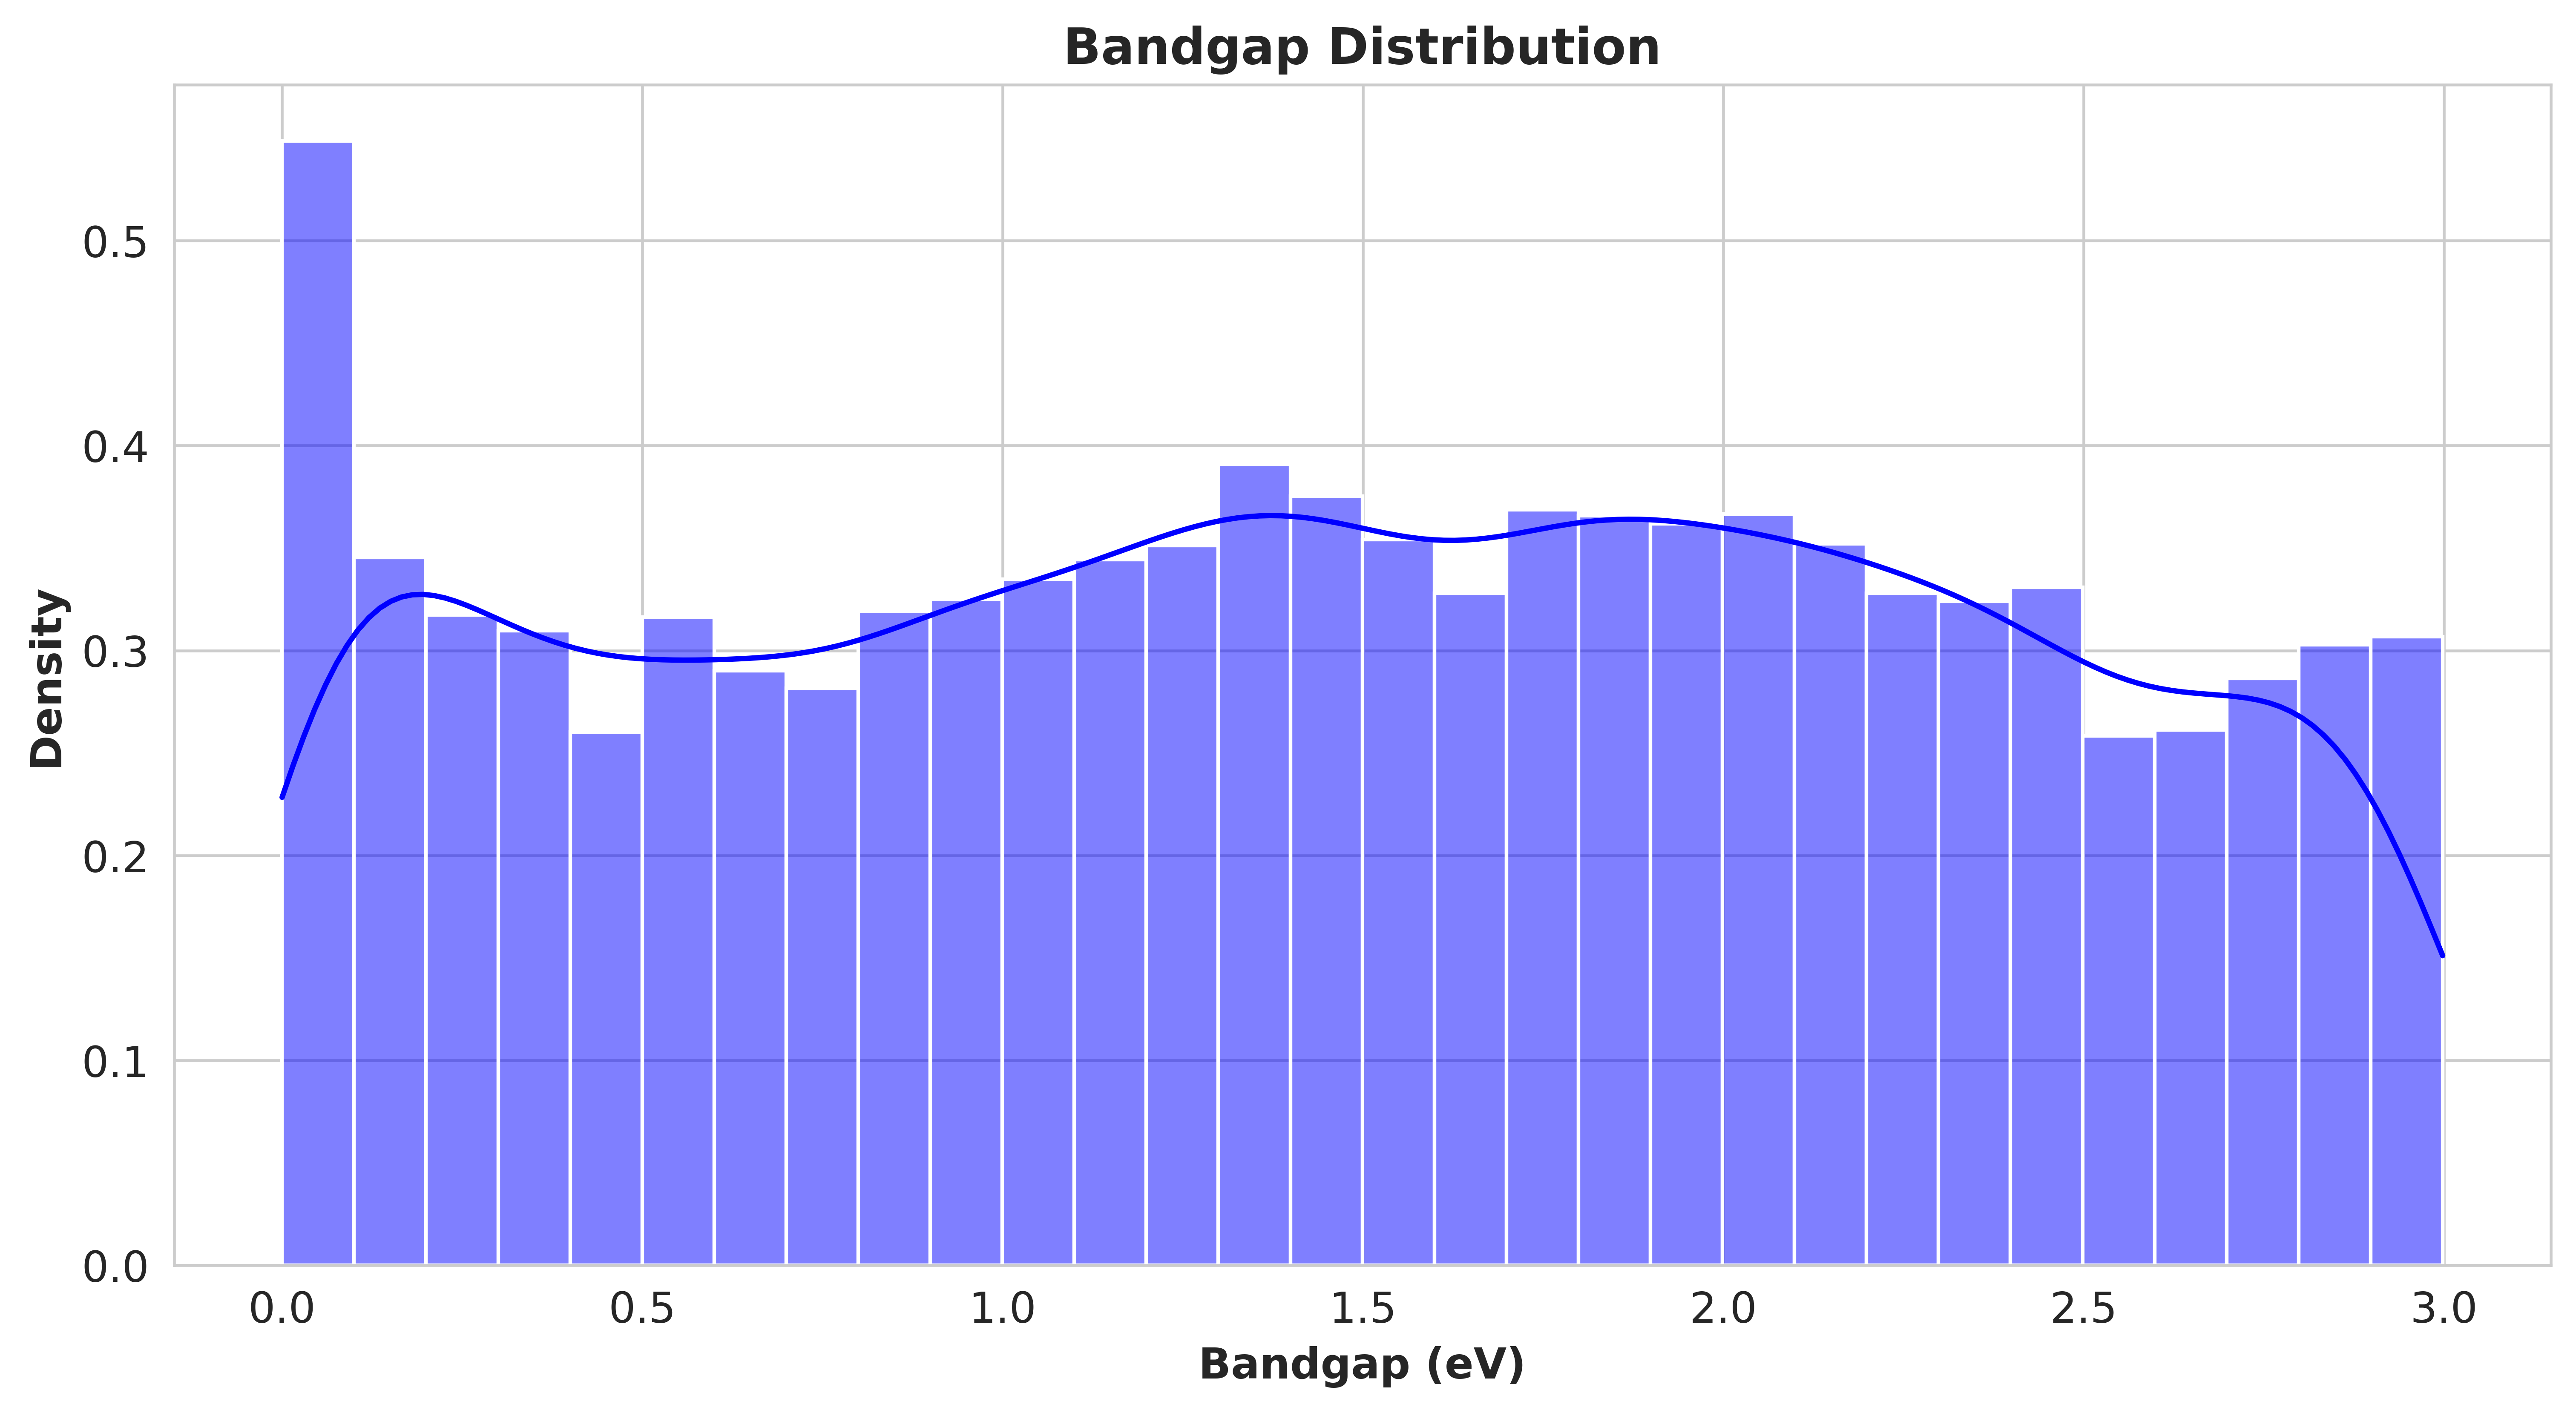

In [ ]:
# draw a distribution plot of the bandgap

plt.figure(figsize=(12, 6), dpi=300)
sns.set_style("whitegrid")
sns.set_palette("Set3")  # Set3, RdBu
sns.histplot(data_df['band_gap'], kde=True, bins=30, color='blue', stat='density')
plt.title("Bandgap Distribution", fontsize=14, weight="bold")
plt.xlabel("Bandgap (eV)", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")

# save the figure
plt.savefig(os.path.join(save_dir, 'bandgap_distribution.png'), dpi=300)
plt.show()

In [ ]:
# 查看数据中氧化物和非氧化物的带隙分布情况
oxides_df = data_df[data_df['composition'].str.contains('O')]
non_oxides_df = data_df[~data_df['composition'].str.contains('O')]

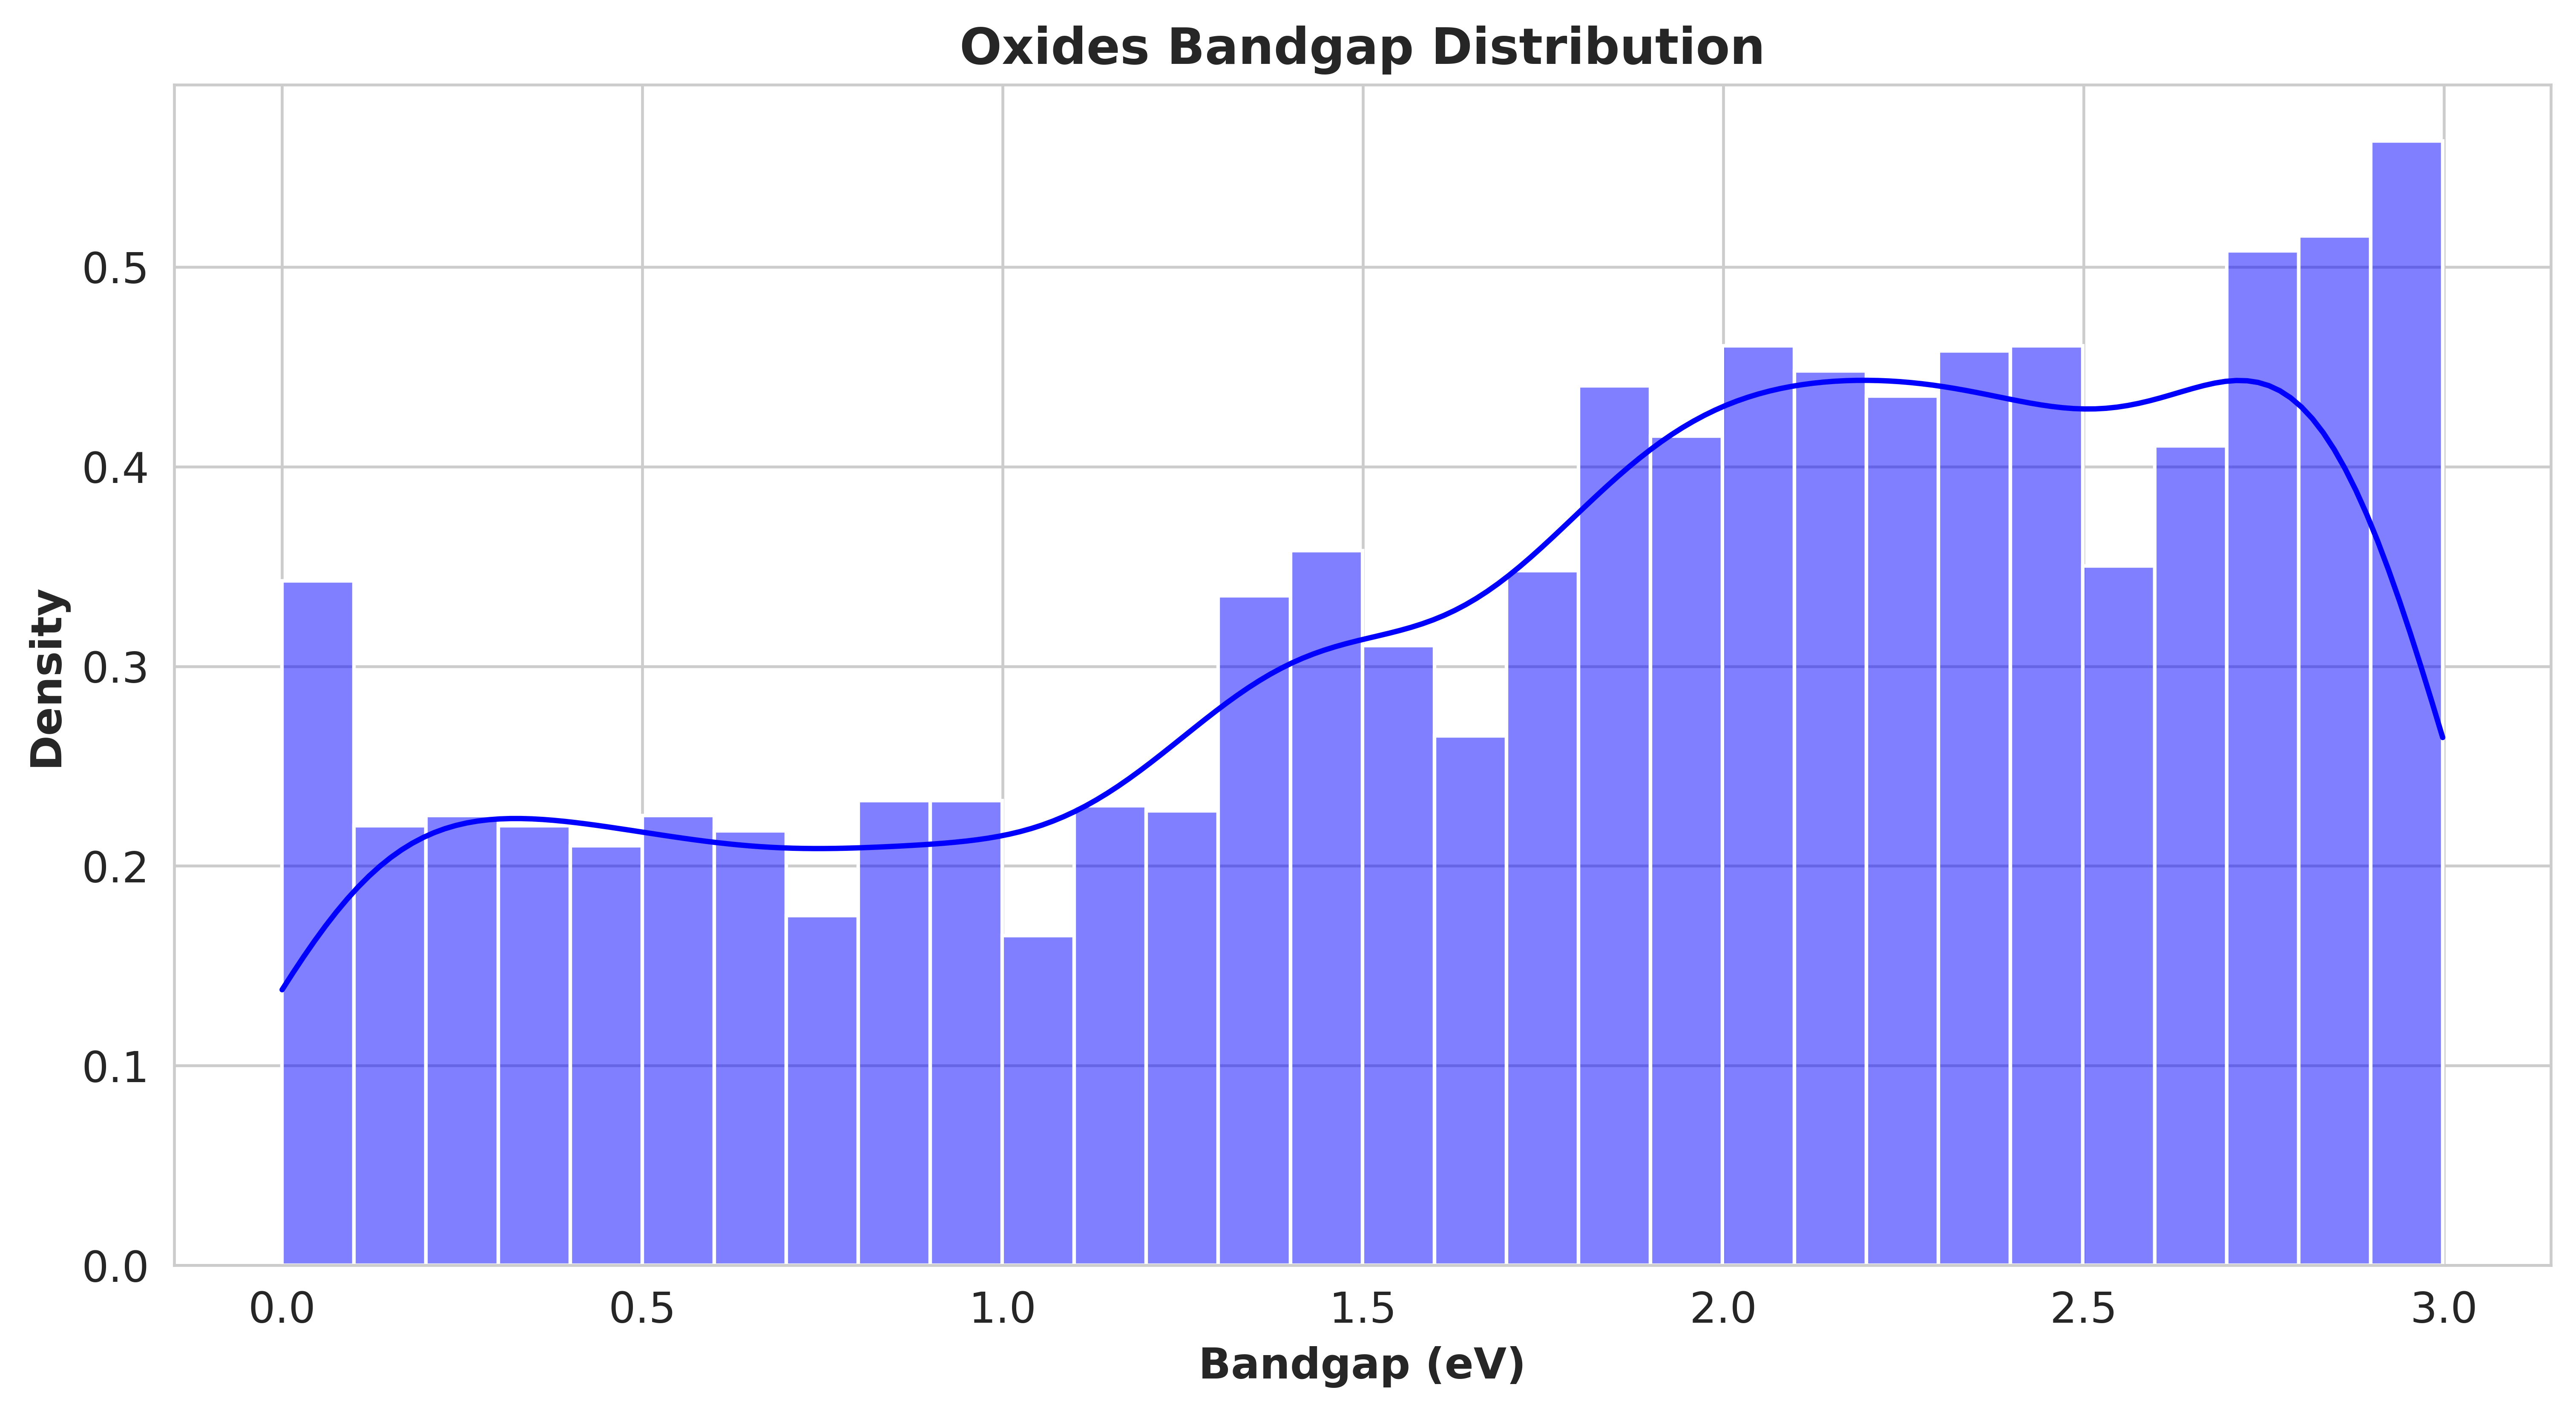

In [ ]:
# draw a distribution plot of the oxides bandgap

plt.figure(figsize=(12, 6), dpi=300)
sns.set_style("whitegrid")
sns.set_palette("Set3")  # Set3, RdBu
sns.histplot(oxides_df['band_gap'], kde=True, bins=30, color='blue', stat='density')
plt.title("Oxides Bandgap Distribution", fontsize=14, weight="bold")
plt.xlabel("Bandgap (eV)", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")

# save the figure
plt.savefig(os.path.join(save_dir, 'oxides_bandgap_distribution.png'), dpi=300)
plt.show()

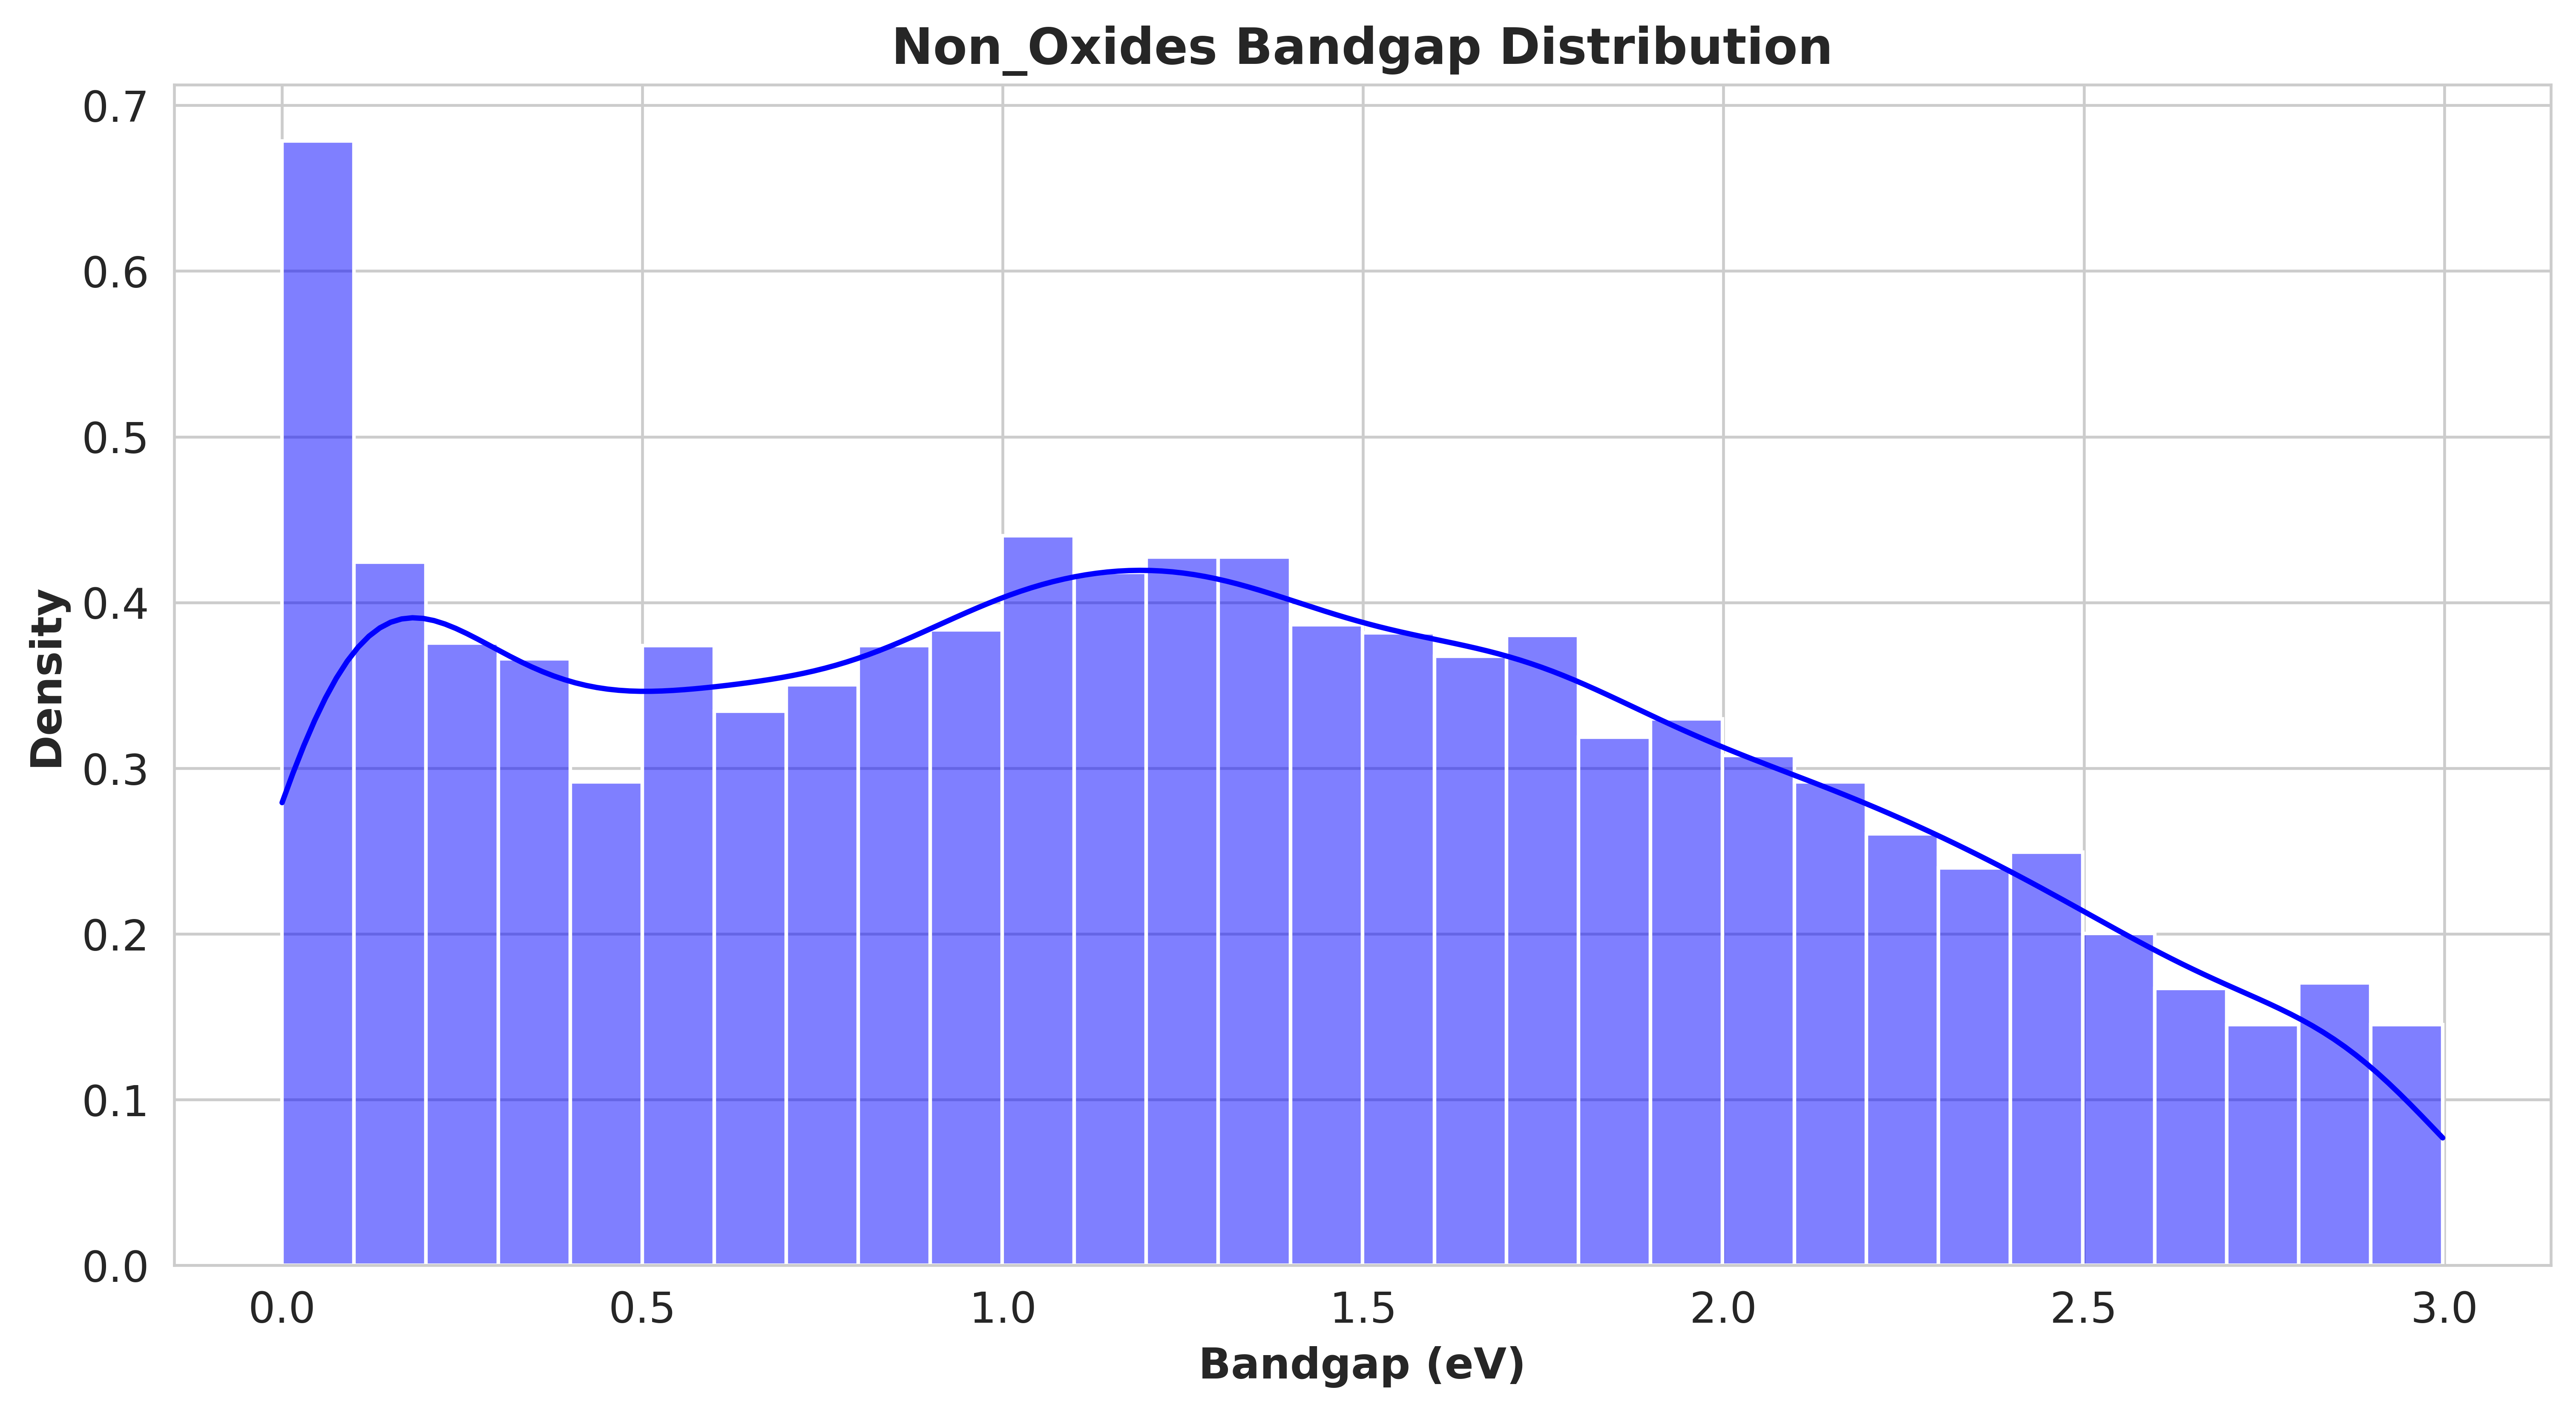

In [ ]:
# draw a distribution plot of the non_oxides bandgap

plt.figure(figsize=(12, 6), dpi=300)
sns.set_style("whitegrid")
sns.set_palette("Set3")  # Set3, RdBu
sns.histplot(non_oxides_df['band_gap'], kde=True, bins=30, color='blue', stat='density')
plt.title("Non_Oxides Bandgap Distribution", fontsize=14, weight="bold")
plt.xlabel("Bandgap (eV)", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")

# save the figure
plt.savefig(os.path.join(save_dir, 'non_oxides_bandgap_distribution.png'), dpi=300)
plt.show()

### Enumerate the crystal systems as numbers
1. Cubic
2. Tetragonal
3. Hexagonal
4. Orthorhombic
5. Monoclinic
6. Triclinic
7. Trigonal

In [ ]:
crystal_system_dict = {
    'Cubic': 0,
    'Tetragonal': 1,
    'Hexagonal': 2,
    'Orthorhombic': 3,
    'Monoclinic': 4,
    'Triclinic': 5,
    'Trigonal': 6
}
data_df['crystal_system'] = data_df['crystal_system'].replace(crystal_system_dict)

/tmp/ipykernel_6820/132375706.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df['crystal_system'] = data_df['crystal_system'].replace(crystal_system_dict)


In [ ]:
# 将is_gap_direct转换为0和1，浮点数
data_df['is_gap_direct'] = data_df['is_gap_direct'].astype(float)

In [ ]:
# 增加氧化物和非氧化物的标签
data_df['is_oxide'] = 0
data_df.loc[data_df['composition'].str.contains('O'), 'is_oxide'] = 1
data_df['is_oxide'] = data_df['is_oxide'].astype(float)

In [ ]:
data_df.head()

,material_id,composition,nsites,crystal_system,space_group,volume,density,density_atomic,efermi,energy_per_atom,formation_energy_per_atom,is_gap_direct,band_gap,is_oxide
0,mp-32800,Ac16 S24,40,1,122,1118.407852,6.535149,27.960196,5.791820,-34.768478,-2.492486,0.0,2.2962,0.0
1,mp-867311,Ac1 Ag1 Te2,4,0,225,122.518406,7.997421,30.629602,6.031096,-36.203183,-0.996232,0.0,0.0794,0.0
2,mp-866101,Ac1 Cr1 O3,5,0,221,61.362845,8.848788,12.272569,6.364737,-8.862593,-3.138972,0.0,2.0031,1.0
3,mp-861502,Ac1 Fe1 O3,5,0,221,61.797311,8.889999,12.359462,6.509045,-8.258555,-2.771539,0.0,0.9888,1.0
4,mp-1183053,Ac1 Ga1 O3,5,0,221,61.455078,9.314495,12.291016,5.476935,-7.461883,-3.063253,0.0,2.8959,1.0


In [ ]:
# Save the raw data to a csv file
file_path = os.path.join(current_dir, './Data/mp_eda_data.csv')
data_df.to_csv(file_path, index=False)

## Exp Data

### Raw Data Distribution

In [ ]:
# read data from 
exp_raw_df = pd.read_csv(os.path.join(current_dir, './Data/Ya Zhuo et data.csv'))
exp_raw_df.rename(columns={'Eg (eV)': 'band_gap'}, inplace=True)
exp_raw_df = exp_raw_df[(exp_raw_df['band_gap'] > 0) & (exp_raw_df['band_gap'] < 3)]
exp_raw_df.shape

,composition,band_gap
0,Hg0.7Cd0.3Te,0.35
1,CuBr,3.08
2,LuP,1.30
3,Cu3SbSe4,0.40
4,ZnO,3.44


In [ ]:
# Visualizing elemental prevalence in the dataset

formula = exp_raw_df.iloc[:, 0]

save_dir = os.path.join(current_dir, './figures/element_prevalence/raw_data/exp')
os.makedirs(save_dir, exist_ok=True)

os.chdir(os.path.join(current_dir, './Utools'))
element_prevalence(formula,
                   name='element_prevalence_ptable',
                   save_dir=save_dir,
                   log_scale=False)
element_prevalence(formula,
                   name='log_element_prevalence_ptable',
                   save_dir=save_dir,
                   log_scale=True)

plt.rcParams.update({'font.size': 12})
element_prevalence(formula,
                   name='element_prevalence',
                   save_dir=save_dir,
                   ptable_fig=False,
                   log_scale=False)
element_prevalence(formula,
                   name='log_element_prevalence',
                   save_dir=save_dir,
                   ptable_fig=False,
                   log_scale=True)
os.chdir(current_dir)

CompositionError: ,65 is an invalid formula!